In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
# creating two lists here for our upcoming dataset
train_labels = []
train_samples = []

Example Data
    - An experimental drug was tested on indivudals from ages 13 ro 100 in a clinical trial
    - The trial had 2100 participants, Half were under 65 y/o, half > 65 y/o
    - 95% of patients 65yo experience side effects
    - 95% <65 yo no side effects

In [3]:
# creating the data

for i in range(50):
    # the ~5% of younger peeps who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # the ~5% of older peeps who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # the ~95% of younger peeps who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # the ~95% of older peeps who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
# we've generated our data now, let's process it!

In [5]:
# converting our lists to numpy arrays
# we need to do this because Keras only accepts numpy arrays
# then we are shuffling the data so that the training is not biased
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
# now we have to scale our ages to fit between a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# we are reshaping the data because the fit_transform method only accepts 2D arrays
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
for i in scaled_train_samples:
    print(i)

[0.43678161]
[0.65517241]
[0.68965517]
[0.94252874]
[0.10344828]
[0.16091954]
[0.65517241]
[0.77011494]
[0.88505747]
[0.34482759]
[0.01149425]
[0.66666667]
[0.63218391]
[0.48275862]
[0.51724138]
[0.88505747]
[0.55172414]
[0.20689655]
[0.6091954]
[0.28735632]
[0.45977011]
[0.7816092]
[0.62068966]
[0.68965517]
[0.93103448]
[0.3908046]
[0.36781609]
[0.3908046]
[0.71264368]
[0.02298851]
[0.24137931]
[0.81609195]
[0.45977011]
[0.87356322]
[0.33333333]
[0.31034483]
[0.52873563]
[0.7816092]
[0.18390805]
[0.]
[0.43678161]
[0.45977011]
[0.31034483]
[0.83908046]
[0.52873563]
[0.25287356]
[0.57471264]
[0.43678161]
[0.7816092]
[0.18390805]
[0.2183908]
[0.70114943]
[0.44827586]
[0.51724138]
[0.28735632]
[0.57471264]
[0.74712644]
[0.35632184]
[0.09195402]
[0.96551724]
[0.96551724]
[0.31034483]
[0.75862069]
[0.96551724]
[0.57471264]
[0.96551724]
[0.03448276]
[0.59770115]
[0.02298851]
[0.32183908]
[0.01149425]
[0.33333333]
[0.90804598]
[0.66666667]
[0.]
[0.3908046]
[0.27586207]
[0.29885057]
[0.4022988

In [8]:
# great, we've generated the data, now let's create the neural network

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [11]:
# now let's build the model

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'), # input layer
    Dense(units=30, activation='relu'), # hidden layer
    Dense(units=2, activation='softmax') # output layer
])

In [12]:
model.summary() # prints out a summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 30)                510       
                                                                 
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
Total params: 604 (2.36 KB)
Trainable params: 604 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# here we are compiling the model

model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [14]:
# now we are fitting the model (which is the training part!)

model.fit(
    x=scaled_train_samples, # the data
    y=train_labels, # the labels (our desired outputs)
    batch_size=10, # the number of samples per gradient update
    epochs=30, # the number of iterations over the entire dataset
    shuffle=True, # whether to shuffle the training data before each epoch
    verbose=2 # the verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    )

Epoch 1/30
210/210 - 0s - loss: 0.6934 - accuracy: 0.5433 - 252ms/epoch - 1ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6723 - accuracy: 0.6100 - 63ms/epoch - 301us/step
Epoch 3/30
210/210 - 0s - loss: 0.6493 - accuracy: 0.6529 - 59ms/epoch - 283us/step
Epoch 4/30
210/210 - 0s - loss: 0.6245 - accuracy: 0.7019 - 64ms/epoch - 306us/step
Epoch 5/30
210/210 - 0s - loss: 0.5984 - accuracy: 0.7219 - 69ms/epoch - 330us/step
Epoch 6/30
210/210 - 0s - loss: 0.5707 - accuracy: 0.7510 - 64ms/epoch - 304us/step
Epoch 7/30
210/210 - 0s - loss: 0.5408 - accuracy: 0.7819 - 60ms/epoch - 284us/step
Epoch 8/30
210/210 - 0s - loss: 0.5100 - accuracy: 0.8114 - 59ms/epoch - 279us/step
Epoch 9/30
210/210 - 0s - loss: 0.4802 - accuracy: 0.8457 - 61ms/epoch - 289us/step
Epoch 10/30
210/210 - 0s - loss: 0.4520 - accuracy: 0.8557 - 59ms/epoch - 282us/step
Epoch 11/30
210/210 - 0s - loss: 0.4257 - accuracy: 0.8738 - 61ms/epoch - 288us/step
Epoch 12/30
210/210 - 0s - loss: 0.4021 - accuracy: 0.8895 - 69ms/epoch - 3

In [15]:
# now let's add a validation set

model.fit(
    x=scaled_train_samples, # the data
    y=train_labels, # the labels (our desired outputs)
    validation_split=0.1, # the percentage of the data that will be used for validation
    batch_size=10, # the number of samples per gradient update
    epochs=30, # the number of iterations over the entire dataset
    shuffle=True, # whether to shuffle the training data before each epoch
    verbose=2 # the verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    )

Epoch 1/30
189/189 - 0s - loss: 0.2607 - accuracy: 0.9444 - val_loss: 0.2773 - val_accuracy: 0.9333 - 133ms/epoch - 705us/step
Epoch 2/30
189/189 - 0s - loss: 0.2596 - accuracy: 0.9418 - val_loss: 0.2764 - val_accuracy: 0.9333 - 80ms/epoch - 423us/step
Epoch 3/30
189/189 - 0s - loss: 0.2583 - accuracy: 0.9460 - val_loss: 0.2757 - val_accuracy: 0.9238 - 78ms/epoch - 413us/step
Epoch 4/30
189/189 - 0s - loss: 0.2574 - accuracy: 0.9466 - val_loss: 0.2748 - val_accuracy: 0.9333 - 77ms/epoch - 410us/step
Epoch 5/30
189/189 - 0s - loss: 0.2565 - accuracy: 0.9460 - val_loss: 0.2740 - val_accuracy: 0.9333 - 77ms/epoch - 410us/step
Epoch 6/30
189/189 - 0s - loss: 0.2555 - accuracy: 0.9392 - val_loss: 0.2737 - val_accuracy: 0.9476 - 71ms/epoch - 377us/step
Epoch 7/30
189/189 - 0s - loss: 0.2549 - accuracy: 0.9487 - val_loss: 0.2726 - val_accuracy: 0.9333 - 78ms/epoch - 412us/step
Epoch 8/30
189/189 - 0s - loss: 0.2542 - accuracy: 0.9407 - val_loss: 0.2720 - val_accuracy: 0.9333 - 73ms/epoch - 38

Sometimes we take not just the validation set to validate data, but we also split the data up into a test set as one additional step in the process

In [16]:
# let's create a test set
# note that this is identical to the training set, but we are using different data

test_labels = []
test_samples = []

In [17]:
# creating the test set
# note that this is identical to the training set, but we are using different data

for i in range(50):
    # the ~5% of younger peeps who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # the ~5% of older peeps who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    # the ~95% of younger peeps who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # the ~95% of older peeps who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [18]:
# converting to numpy arrays and shuffling the data

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
# scaling the data

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [20]:
###

In [21]:
# time to make some predictions!

predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [22]:
for i in predictions:
    print(i)

[0.9723141  0.02768593]
[0.09539956 0.90460044]
[0.97212243 0.02787751]
[0.97212243 0.02787751]
[0.9711237  0.02887634]
[0.15750967 0.8424903 ]
[0.97212243 0.02787751]
[0.971791 0.028209]
[0.02477512 0.97522485]
[0.97191364 0.02808632]
[0.9722864  0.02771357]
[0.96229476 0.03770521]
[0.972146   0.02785404]
[0.9711237  0.02887634]
[0.15750967 0.8424903 ]
[0.02701792 0.9729821 ]
[0.9678661  0.03213388]
[0.9722864  0.02771357]
[0.25538087 0.74461913]
[0.01602197 0.9839781 ]
[0.93118316 0.0688169 ]
[0.5388174  0.46118253]
[0.0349934  0.96500653]
[0.18562639 0.81437355]
[0.09539956 0.90460044]
[0.06879994 0.9312001 ]
[0.08799366 0.9120064 ]
[0.97192264 0.02807734]
[0.8801795  0.11982052]
[0.08111111 0.91888887]
[0.08111111 0.91888887]
[0.96229476 0.03770521]
[0.01467817 0.98532176]
[0.3876344 0.6123656]
[0.02945765 0.9705423 ]
[0.9710316  0.02896835]
[0.8801795  0.11982052]
[0.96668017 0.03331983]
[0.2185051  0.78149486]
[0.11189862 0.8881014 ]
[0.9718412  0.02815878]
[0.9722396  0.02776032

In [23]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [24]:
for i in rounded_predictions:
    print(i)    

0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
1
1
0
0
0
1
1
0
0
1
0
1
1
1
0
0
1
0
0
1
1
1
1
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
1
1
1
1
0
1
1
0
0
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
0
0
0
1
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
1
1
1
0
1
1
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
0
0
0
0
0
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
0
0
0
1
1
0
1
0
1
0
0
1
0
1
1
0
0
1
1
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
0
0
1
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
0
0
0
0
0
0
0
1
0
1
1
0
1
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
0
0
0
0
1
1
0
0
1
1
1
1
1
0
1
1


In [25]:
# okay, we know how accurate our model is on the training data
# but how accurate is it on the test data?
# we use a confusion matrix to find out

In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """ 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
    else:
            print('Confusion matrix, without normalization')
    
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 983   67]
 [  49 1001]]


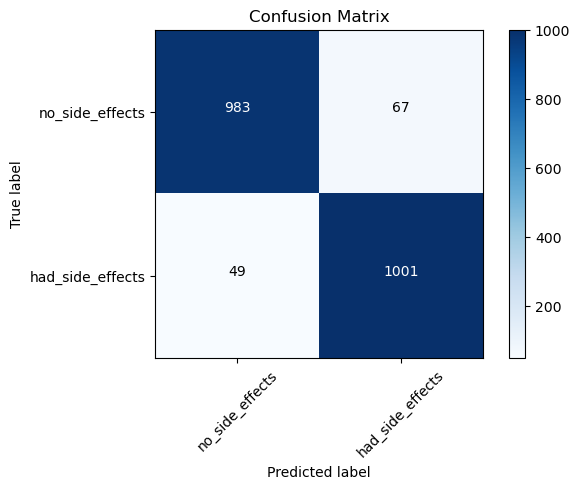

In [29]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
### saving the model

In [31]:
# this method checks to see if the file already exists
# if not, it saves the model to disk

import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [32]:
# now let's load the model

from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [33]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                32        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# if you'd like to inspect the weights and biases of the model

new_model.get_weights()

[array([[ 0.5484248 , -0.5911027 , -0.31367615,  0.7367659 , -0.30408642,
         -0.3574236 , -0.17050788, -0.07099736, -0.05878657,  0.52168113,
          0.36185488, -0.01213461, -0.03105849, -0.22480473, -0.12572107,
         -0.13494945]], dtype=float32),
 array([-0.18273783,  0.        ,  0.        , -0.13959484,  0.        ,
         0.        ,  0.24313395,  0.        ,  0.        , -0.15097786,
         0.06179244,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 7.13640377e-02,  2.73798734e-01, -1.87373757e-01,
         -1.16317883e-01, -3.83933753e-01,  2.21261322e-01,
          2.26950869e-01,  3.62784386e-01,  3.24859411e-01,
          2.29808137e-01, -5.49570978e-01,  2.82490700e-01,
         -2.46854667e-02,  1.36989295e-01,  4.86945033e-01,
          1.89497590e-01,  1.06810026e-01, -6.23036921e-01,
         -1.07476905e-01, -3.13885033e-01,  5.41373730e-01,
         -4.97894347e-01, -2.57878423e-01,  4.58503634e-01,
 

In [35]:
new_model.optimizer

In [36]:
# we can also save this model as a JSON file
# this only saves the architecture of the model, not the weights and biases

In [37]:
# save to JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [38]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {

In [39]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

In [40]:
# again, this model isn't trained yet, so we have to compile it
# no weights, no biases, just the architecture

model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 30)                510       
                                                                 
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
Total params: 604 (2.36 KB)
Trainable params: 604 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# we can also save ONLY the weights of a model by using .save_weights()

import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [42]:
# because we are just saving the weights, we have to create the model first

model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'), # input layer
    Dense(units=32, activation='relu'), # hidden layer
    Dense(units=2, activation='softmax') # output layer
])

In [43]:
# load em up

model2.load_weights('models/my_model_weights.h5')

In [44]:
# checking to see!

model2.get_weights()

[array([[ 0.5484248 , -0.5911027 , -0.31367615,  0.7367659 , -0.30408642,
         -0.3574236 , -0.17050788, -0.07099736, -0.05878657,  0.52168113,
          0.36185488, -0.01213461, -0.03105849, -0.22480473, -0.12572107,
         -0.13494945]], dtype=float32),
 array([-0.18273783,  0.        ,  0.        , -0.13959484,  0.        ,
         0.        ,  0.24313395,  0.        ,  0.        , -0.15097786,
         0.06179244,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 7.13640377e-02,  2.73798734e-01, -1.87373757e-01,
         -1.16317883e-01, -3.83933753e-01,  2.21261322e-01,
          2.26950869e-01,  3.62784386e-01,  3.24859411e-01,
          2.29808137e-01, -5.49570978e-01,  2.82490700e-01,
         -2.46854667e-02,  1.36989295e-01,  4.86945033e-01,
          1.89497590e-01,  1.06810026e-01, -6.23036921e-01,
         -1.07476905e-01, -3.13885033e-01,  5.41373730e-01,
         -4.97894347e-01, -2.57878423e-01,  4.58503634e-01,
 